#### Ex: Plot the following function over an appropriate range:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

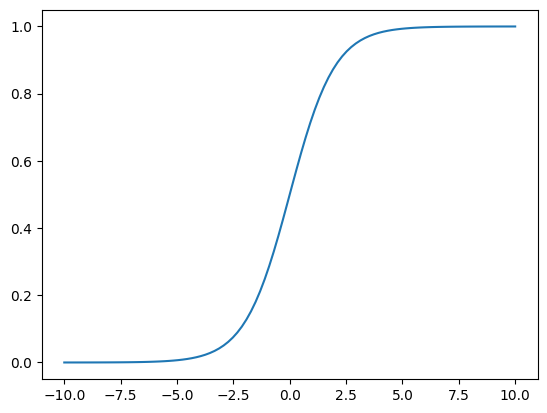

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10, 100)
sigma1 = 1 / (1 + np.exp(-x) )

plt.plot(x, sigma1)
plt.show()

## **📌 Supervised Learning – Classification (Logistic Regression)**

**February 10, 2025**

## Introduction
Logistic regression is a fundamental classification algorithm that predicts categorical outcomes. Despite its name, it is a classification method rather than a regression model. It is widely used in machine learning for binary classification tasks and serves as a foundation for more advanced classification techniques.

## Linear Classification
A linear classifier separates data points into two distinct classes using a linear decision boundary. The equation of a hyperplane in an $n$-dimensional feature space is given by:

$$
z = \mathbf{w}^T \mathbf{x} + b
$$

If the data is linearly separable, a single hyperplane can perfectly classify the data. Otherwise, techniques like logistic regression introduce probabilistic modeling to handle misclassification cases.

## Logistic Regression
Logistic regression applies the sigmoid activation function to model the probability of class membership:

$$
P(y=1 | \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b)
$$

where $\sigma(z)$ is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This function ensures probabilities remain between 0 and 1.

### Loss Function
Logistic regression minimizes the binary cross-entropy loss:

$$
J(\mathbf{w}) = -\frac{1}{m} \sum_{i=1}^{m} \Big[y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{y}^{(i)})\Big]
$$

## Implementation and Optimization
Gradient descent updates the model parameters iteratively:

$$
\mathbf{w} \leftarrow \mathbf{w} - \alpha \frac{\partial J}{\partial \mathbf{w}}
$$

where $\alpha$ is the learning rate.

### Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent updates weights after each training sample, making it computationally efficient for large datasets. The update rule is:

$$
\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla J(\mathbf{w}, x^{(i)}, y^{(i)})
$$

## Finding Optimal Hyperparameters via Grid Search
Grid search systematically evaluates different hyperparameter combinations. In Python:

```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
gs = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', cv=5)
gs.fit(X_train, y_train)

print("Best parameters:", gs.best_params_)
```


## Classification Metrics
Evaluating classification models involves several metrics:

- **Accuracy**:  
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precision**:  
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall**:  
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1-score**:  
  The harmonic mean of precision and recall:  
  $$
  \text{F1-score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

---

### Confusion Matrix and Performance Evaluation
A confusion matrix provides a breakdown of classification results:

|                  | Predicted Positive | Predicted Negative |
|------------------|-------------------|-------------------|
| **Actual Positive** | True Positive (TP)  | False Negative (FN)  |
| **Actual Negative** | False Positive (FP) | True Negative (TN)   |


#### Definitions
- **True Positive (TP)**: The model correctly predicts a positive instance.
- **True Negative (TN)**: The model correctly predicts a negative instance.
- **False Positive (FP)**: The model incorrectly classifies a negative instance as positive (Type I Error).
- **False Negative (FN)**: The model incorrectly classifies a positive instance as negative (Type II Error).

  
#### Significance of Errors
False positives and false negatives have different consequences depending on the application:

- **Medical Diagnosis**: A **false negative (FN)** could mean failing to detect a disease, which can be life-threatening.
- **Spam Filtering**: A **false positive (FP)** means marking a legitimate email as spam, causing inconvenience.

---

### ROC Curve
The **Receiver Operating Characteristic (ROC) curve** plots the **true positive rate (TPR)** against the **false positive rate (FPR)**. The **area under the curve (AUC)** measures model performance.

To compute and visualize the ROC curve in Python:

```python
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



# Case Study: Predicting Diabetes

## Dataset Overview

The **Pima Indians Diabetes Dataset** consists of **768 samples** and **8 medical attributes**, along with a **binary target variable** indicating diabetes diagnosis (**1 = Diabetes, 0 = No Diabetes**).

## 🏷 Features:
- **Pregnancies** – Number of times pregnant  
- **Glucose** – Plasma glucose concentration  
- **BloodPressure** – Diastolic blood pressure (mm Hg)  
- **SkinThickness** – Triceps skinfold thickness (mm)  
- **Insulin** – 2-Hour serum insulin (mu U/ml)  
- **BMI** – Body mass index (weight in kg/(height in m)²)  
- **DiabetesPedigreeFunction** – Diabetes pedigree function (genetic factor)  
- **Age** – Age of the patient (years)  

## 🎯 Target Variable (Outcome):
- **1** → Patient has diabetes  
- **0** → Patient does not have diabetes  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load dataset from an online source
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", 
           "DiabetesPedigreeFunction", "Age", "Outcome"]

# Read dataset
df = pd.read_csv(url, names=columns)

# Display first five rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis (EDA)
Check for Missing Values

In [6]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Basic Statistics

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualizing the Target Distribution

C:\Users\scgoo\AppData\Local\Temp\ipykernel_7524\209468088.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Outcome'], palette="pastel")


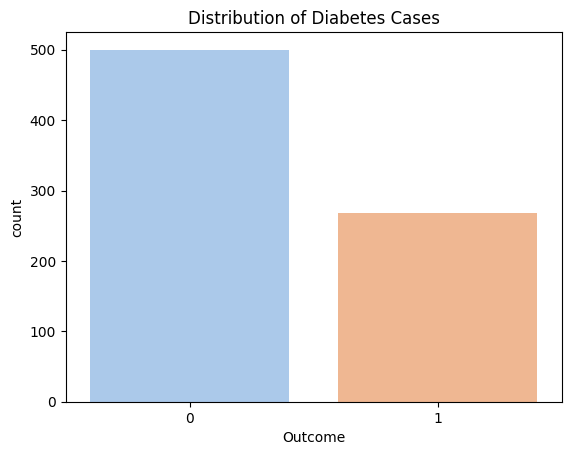

In [8]:
sns.countplot(x=df['Outcome'], palette="pastel")
plt.title("Distribution of Diabetes Cases")
plt.show()

### Feature Correlations

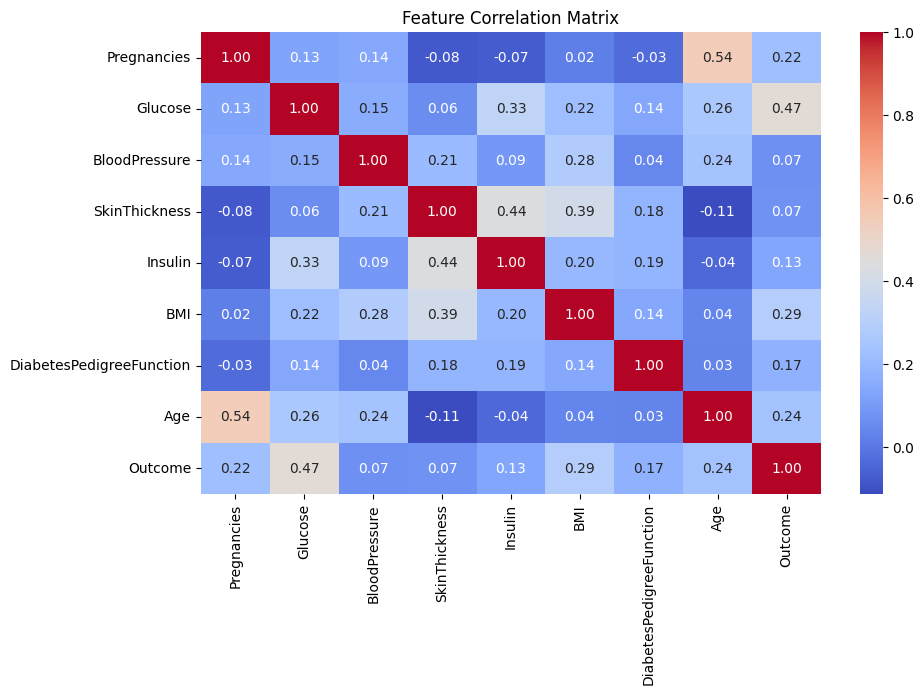

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


### Data Preprocessing
Before training our model, we need to:

- Replace zero values in `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` with their respective **median values**.
- Normalize the dataset using StandardScaler.

In [10]:
# Replace 0 values with median for selected columns
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    df[col].replace(0, df[col].median(), inplace=True)

# Splitting the dataset into training and test sets
X = df.drop(columns=["Outcome"])
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\scgoo\AppData\Local\Temp\ipykernel_7524\3246570820.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, df[col].median(), inplace=True)
C:\Users\scgoo\AppData\Local\Temp\ipykernel_7524\3246570820.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

###  Training the Logistic Regression Model

In [11]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.77


### Model Evaluation
##### Confusion Matrix

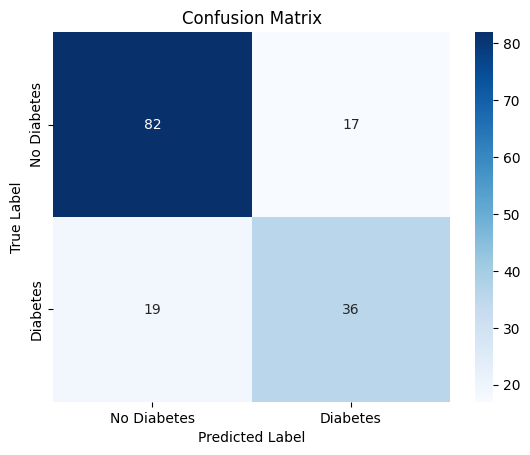

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#### Classification Report

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



## 📊 Classification Report Interpretation

The model achieves **77% accuracy**, performing better on **non-diabetic cases (class 0)** with **81% precision** and **83% recall**, while struggling with **diabetic cases (class 1)** (**68% precision**, **65% recall**). The **macro average F1-score is 74%**, indicating a moderate balance between classes. The **weighted average (77%)** favors class 0 due to more samples. To improve, consider **balancing the dataset, adjusting thresholds, or exploring different models** to enhance recall for class 1, which is crucial for identifying diabetic patients. 🚀


### ROC Curve and AUC Score

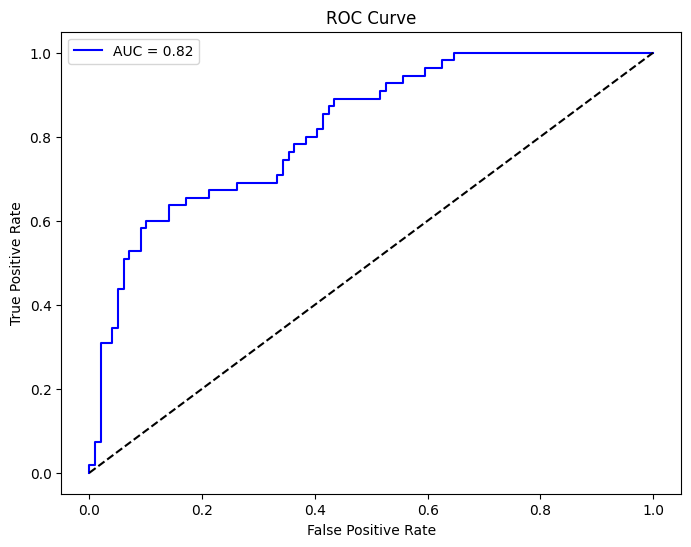

In [14]:
# Compute probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


###  Hyperparameter Tuning Using Grid Search
To improve model performance, we can tune the regularization parameter `C` using `GridSearchCV`.

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"]}
gs = GridSearchCV(LogisticRegression(solver="liblinear"), param_grid, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", gs.best_params_)

# Evaluate best model
best_model = gs.best_estimator_
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



---

<br> <br> <br>